Here we will look at the success of movies as related to its genre and the relationship between budget and revenue/profit.

Genres are taken from The Movie Database (TMDb), while budget and revenue information comes from the supplied dataset from The Numbers Database.

There are many different measures that could define success of a movie, but in this case we will look primarily at return on investment (ROI).

$$ROI = \frac{revenue - budget}{budget} * 100$$


Importing the neccessary libraries and reading the data from the csvs.

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

Defining visualization variables

In [2]:
palette = "YlGnBu"
context = "poster"
size_long = (33, 10)
size_square = (25, 15)
figpath = "Visualizations/Genre and Budget Analysis/"

In [3]:
clean_df = pd.read_csv("Data/cleaned_data.csv")

In [4]:
#clean_df = clean_df.drop(columns = "Unnamed: 0")

In [5]:
#clean_df["roi (%)"] = clean_df["roi"] * 100

In [6]:
clean_df.shape

(4161, 36)

### Questions:
Which genre is the most/least profitable (ROI)?

Which genre has the highest/lowest revenue?

Which genre has been the most/least profitable (ROI) in the last 10 years?

Which genre has had the highest/lowest revenue in the last 10 years?

Does a higher movie budget equate to higher ROI/profit?

Does a higher movie budget equate to higher revenue?

Which popular genre combinations are the most/least profitable (ROI)?

Which popular genre combination has the highest/lowest revenue?

#### Investigating the first two questions:

Which genre is the most/least profitable (ROI)?

Which genre has the highest/lowest revenue?

In [7]:
clean_df.head()

,title,original_title,year,month,day,release_date,production_budget,domestic_gross,worldwide_gross,worldwide_profit(loss),...,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,overview
0,Avatar,Avatar,2009,12,10,2009-12-10,425000000,760507625,2776345279,2351345279,...,False,False,False,False,True,False,False,False,False,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,5,14,2011-05-14,410600000,241063875,1045663875,635063875,...,False,False,False,False,False,False,False,False,False,Captain Jack Sparrow crosses paths with a woma...
2,Dark Phoenix,Dark Phoenix,2019,6,5,2019-06-05,350000000,42762350,149762350,-200237650,...,False,False,False,False,True,False,False,False,False,The X-Men face their most formidable and power...
3,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,4,22,2015-04-22,330600000,459005868,1403013963,1072413963,...,False,False,False,False,True,False,False,False,False,When Tony Stark tries to jumpstart a dormant p...
4,Avengers: Infinity War,Avengers: Infinity War,2018,4,25,2018-04-25,300000000,678815482,2048134200,1748134200,...,False,False,False,False,True,False,False,False,False,As the Avengers and their allies have continue...


Creating a function to calculate the median ROI for each genre and storing them in a dictionary

In [8]:
def roi_by_genre(genre, df):
        try:
            return df.groupby(genre).median()["roi"].loc[True]
        except KeyError:
            return None

In [9]:
genre_names = clean_df[["adventure", "animation", "comedy", "crime", "documentary", "drama", "family", "fantasy", "history", "horror", "music", "mystery", "romance", "science_fiction", "tv_movie", "thriller", "war", "western"]].columns

In [10]:
genre_names

Index(['adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'tv_movie', 'thriller', 'war', 'western'],
      dtype='object')

In [11]:
median_roi_genre = {}
for genre in genre_names:
    median_roi_genre[genre] = roi_by_genre(genre, clean_df)

In [12]:
titles = list(median_roi_genre.keys())

Creating a function to clean the title format

In [13]:
def clean_titles(titles):
    clean_titles = {}
    for element in titles:
        clean_titles[element] = element.replace("_", " ").title()
    clean_titles["science_fiction"] = "Sci Fi"
    return clean_titles

In [14]:
titles_clean = list(clean_titles(titles).values())

In [15]:
ROIs = list(median_roi_genre.values())

Plotting bar chart of Median ROI by Movie Genre 

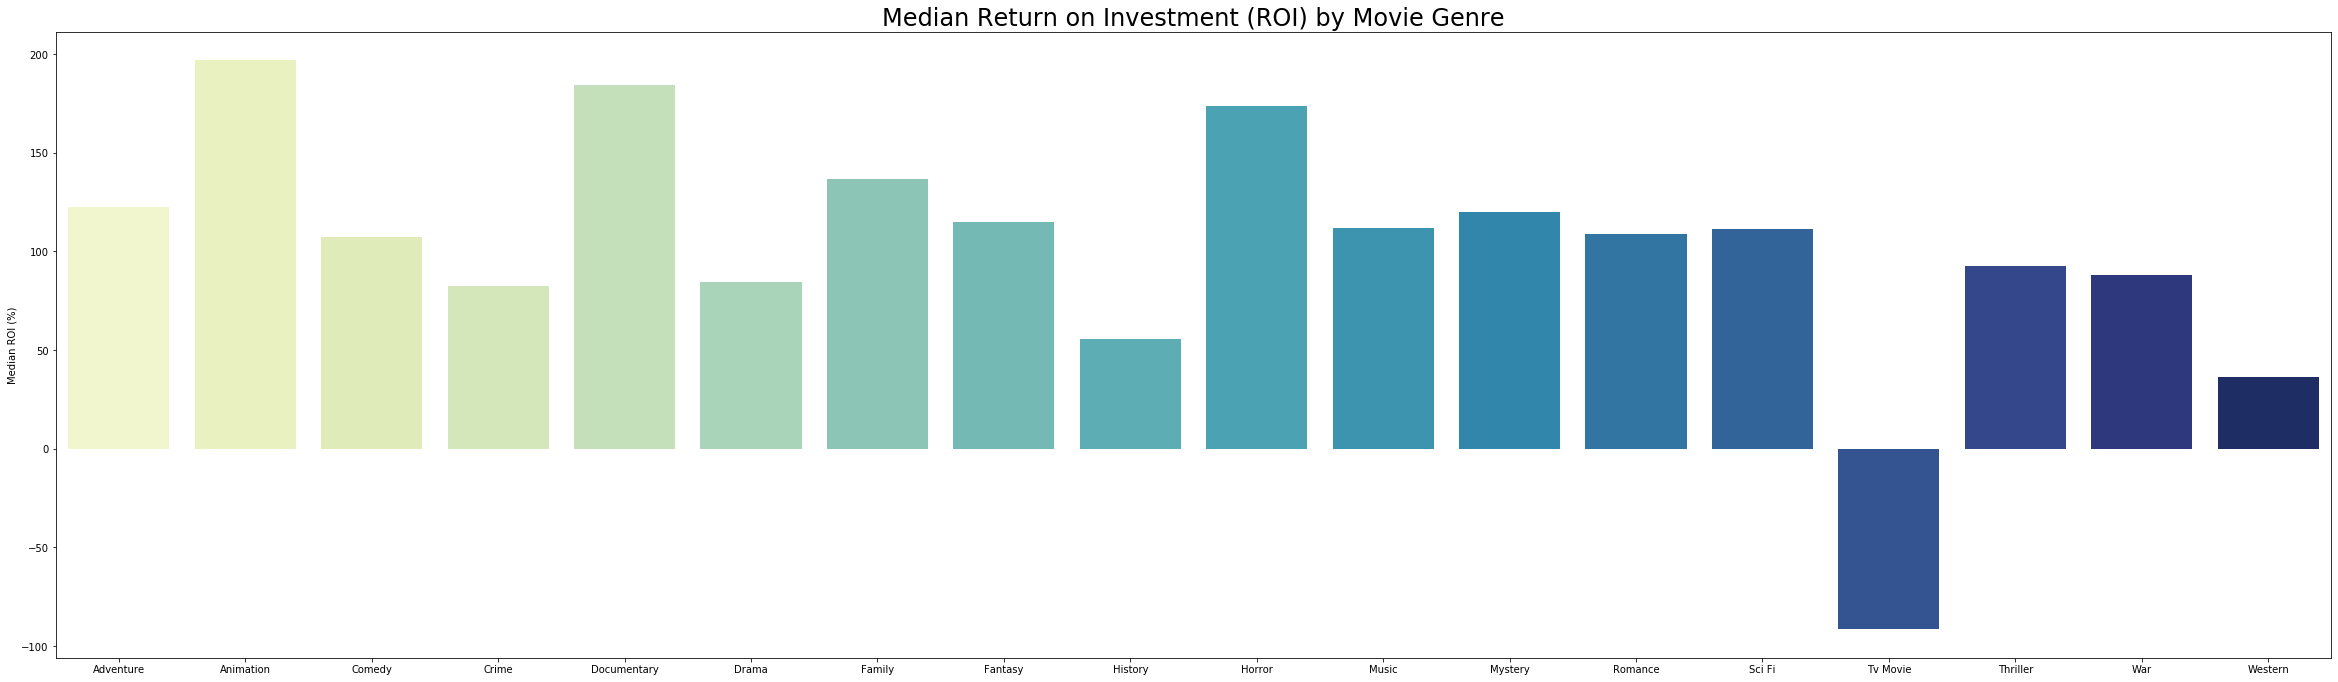

In [16]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size_long)
ROI_plot = sns.barplot(titles_clean, ROIs, palette = palette, ax=ax)
ROI_plot.set_title("Median Return on Investment (ROI) by Movie Genre")
ROI_plot.set_ylabel("Median ROI (%)")
plt.tight_layout()
plt.savefig(figpath + "Median ROI Genre.png")
plt.show()

Creating a function that calculates median revenue for each genre and storing results in a dictionary

In [17]:
def revenue_by_genre(genre, df):
        try:
            return df.groupby(genre).median()["worldwide_gross"].loc[True]
        except KeyError:
            return None

In [18]:
median_revenue_genre = {}
for genre in genre_names:
    median_revenue_genre[genre] = revenue_by_genre(genre, clean_df)

In [19]:
median_revenue_genre

{'adventure': 123053021.5,
 'animation': 216562312.0,
 'comedy': 41216751.0,
 'crime': 43926927.5,
 'documentary': 4337162.5,
 'drama': 29286937.5,
 'family': 98114471.0,
 'fantasy': 113439644.5,
 'history': 37297300.0,
 'horror': 38660873.5,
 'music': 23323631.0,
 'mystery': 53990972.5,
 'romance': 34343438.0,
 'science_fiction': 75059552.5,
 'tv_movie': 252726.0,
 'thriller': 49486874.0,
 'war': 49196532.0,
 'western': 15506815.5}

Cleaning the titles using cleaning function

In [20]:
titles_clean_rev = list(clean_titles(list(median_revenue_genre.keys())).values())

In [21]:
rev = list(median_revenue_genre.values())

Plotting bar chart of median revenue per genre

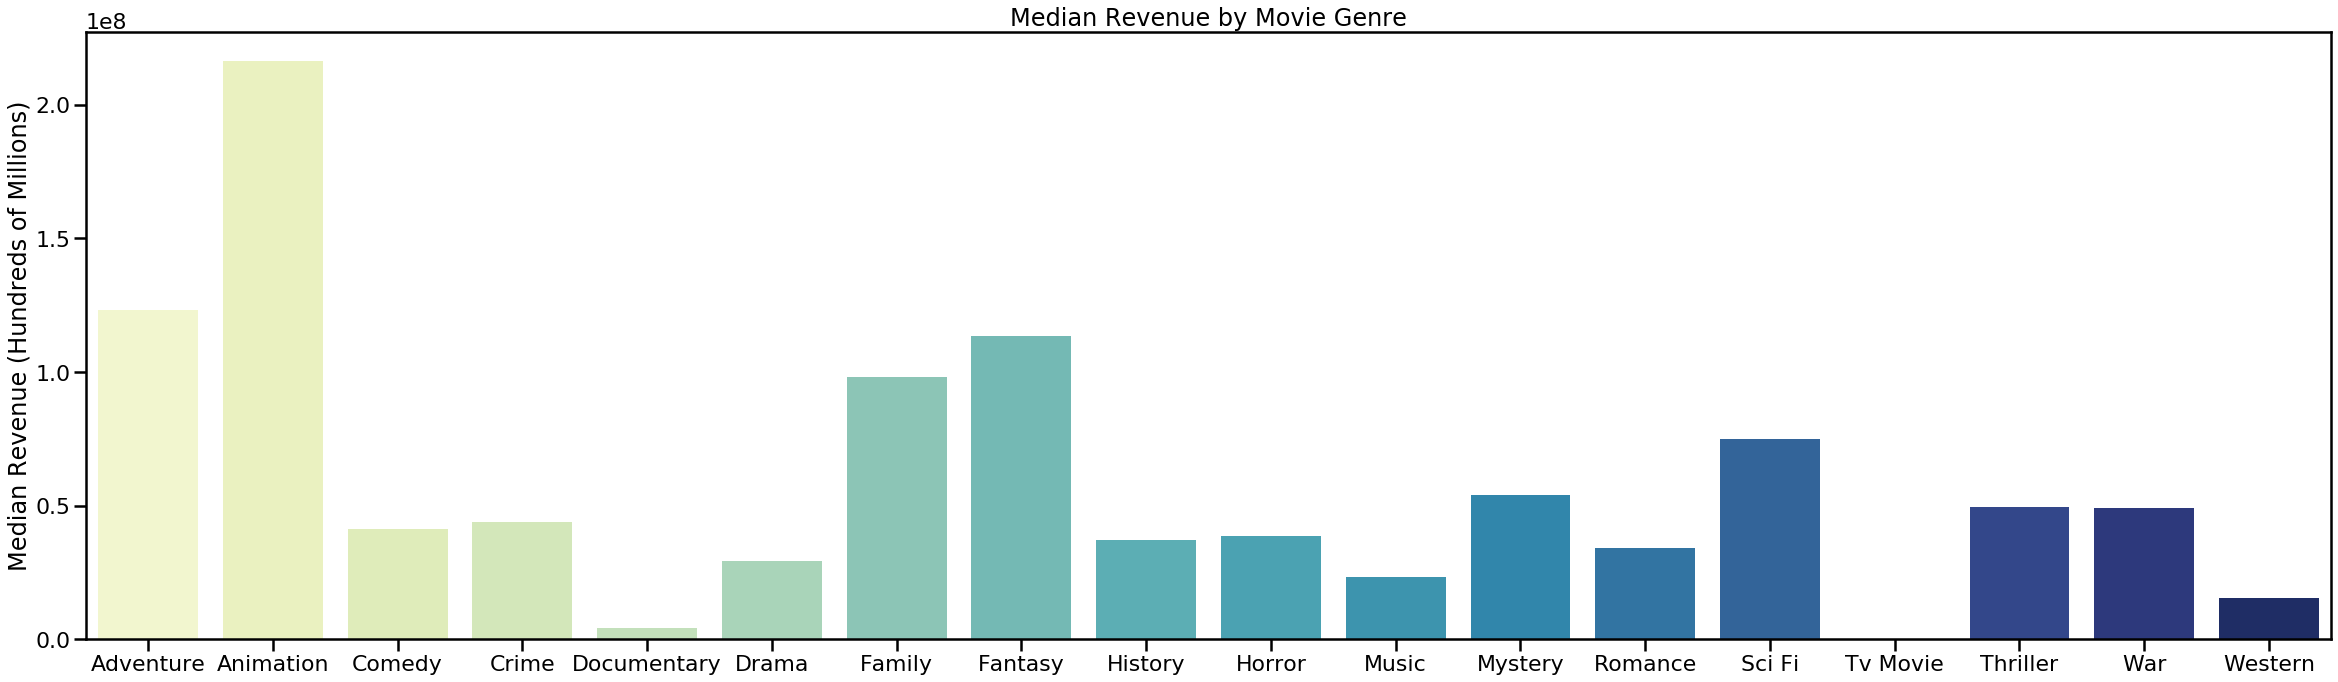

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
rev_plot = sns.barplot(titles_clean_rev, rev, palette = palette, ax=ax)
rev_plot.set_title("Median Revenue by Movie Genre")
rev_plot.set_ylabel("Median Revenue (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Median Rev Genre.png")
plt.show()

#### Investigating the next two questions:

Which genre has been the most/least profitable (ROI) in the last 10 years?

Which genre has had the highest/lowest revenue in the last 10 years?

Creating a new dataframe of movies from the last 10 years

In [23]:
last_10 = clean_df[clean_df["year"] >= 2010]

Using ROI function on new dataframe and storing results of roi by genre in a dictionary

In [24]:
median_roi_genre_10 = {}
for genre in genre_names:
    median_roi_genre_10[genre] = roi_by_genre(genre, last_10)

Cleaning titles using clean titles function

In [25]:
clean_titles_10 = list(clean_titles(list(median_roi_genre_10.keys())).values())

In [26]:
ROIs_10 = list(median_roi_genre_10.values())

Plotting barchart of Median ROI for each genre over the last 10 years

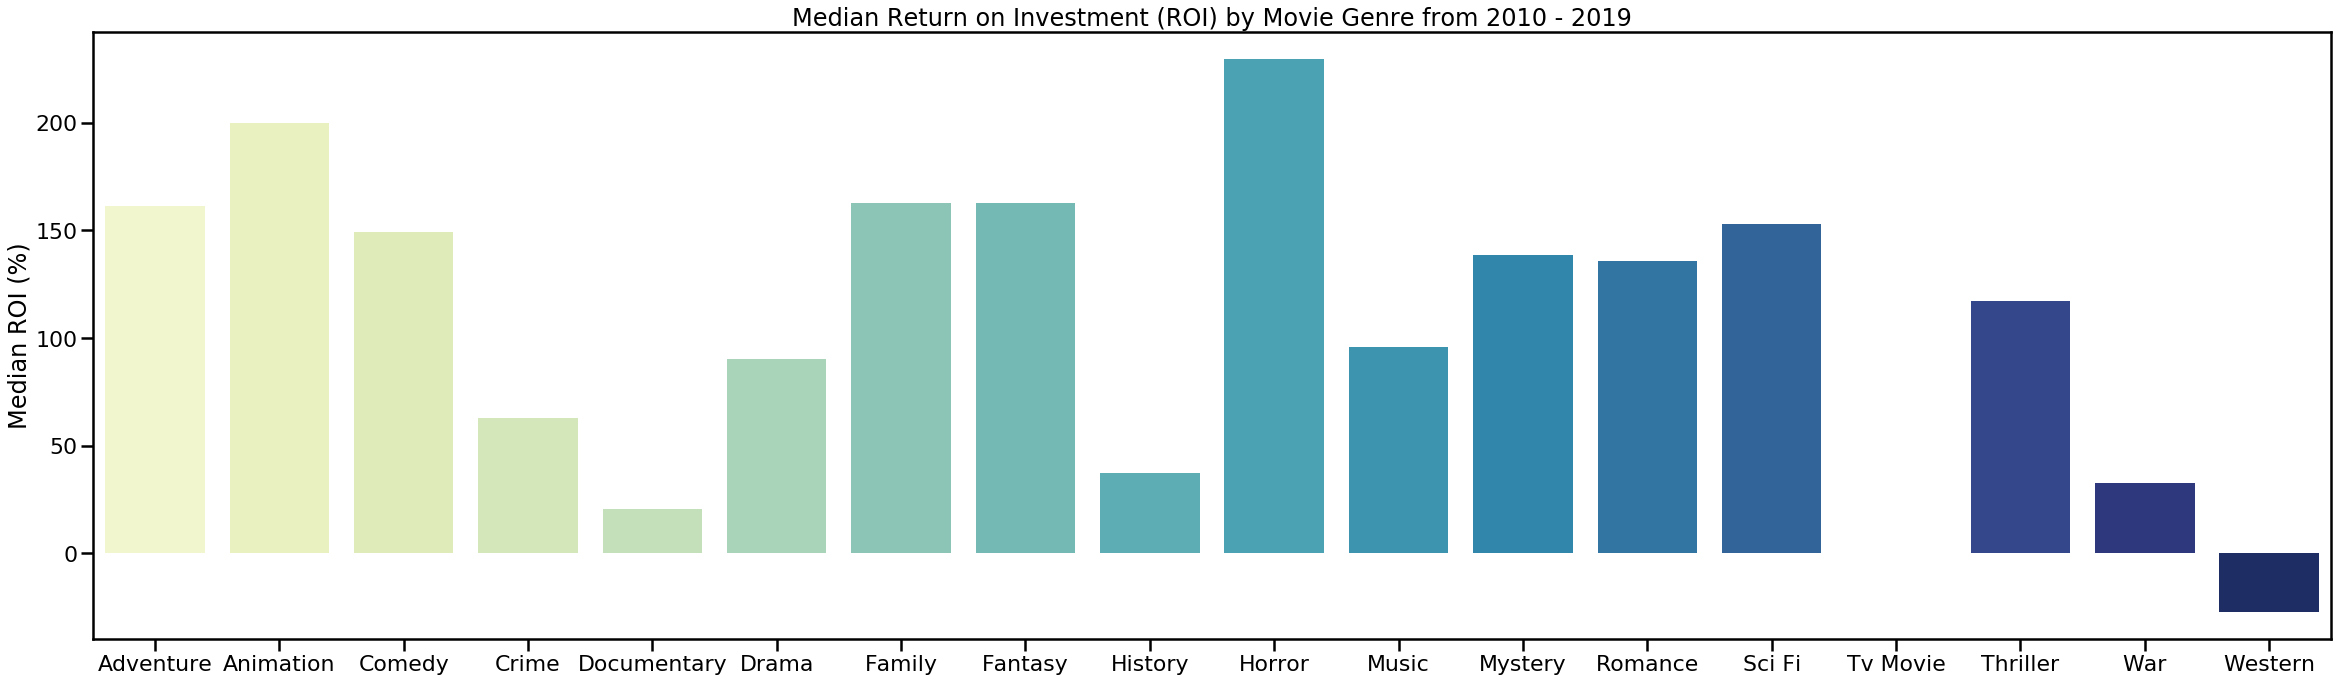

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
ROI_plot_10 = sns.barplot(clean_titles_10, ROIs_10, palette = palette, ax=ax)
ROI_plot_10.set_title("Median Return on Investment (ROI) by Movie Genre from 2010 - 2019")
ROI_plot_10.set_ylabel("Median ROI (%)")
plt.tight_layout()
plt.savefig(figpath + "Median ROI Genre 10.png")
plt.show()

Calculating median revenue per genre using revenue function and storing results in a dictionary

In [28]:
median_revenue_genre_10 = {}
for genre in genre_names:
    median_revenue_genre_10[genre] = revenue_by_genre(genre, last_10)

Cleaning revenue titles using cleaning function

In [29]:
titles_rev_10 = list(clean_titles(median_revenue_genre_10.keys()).values())

In [30]:
rev_10 = list(median_revenue_genre_10.values())

Plotting bar chart of median revenue for each genre over the last 10 years

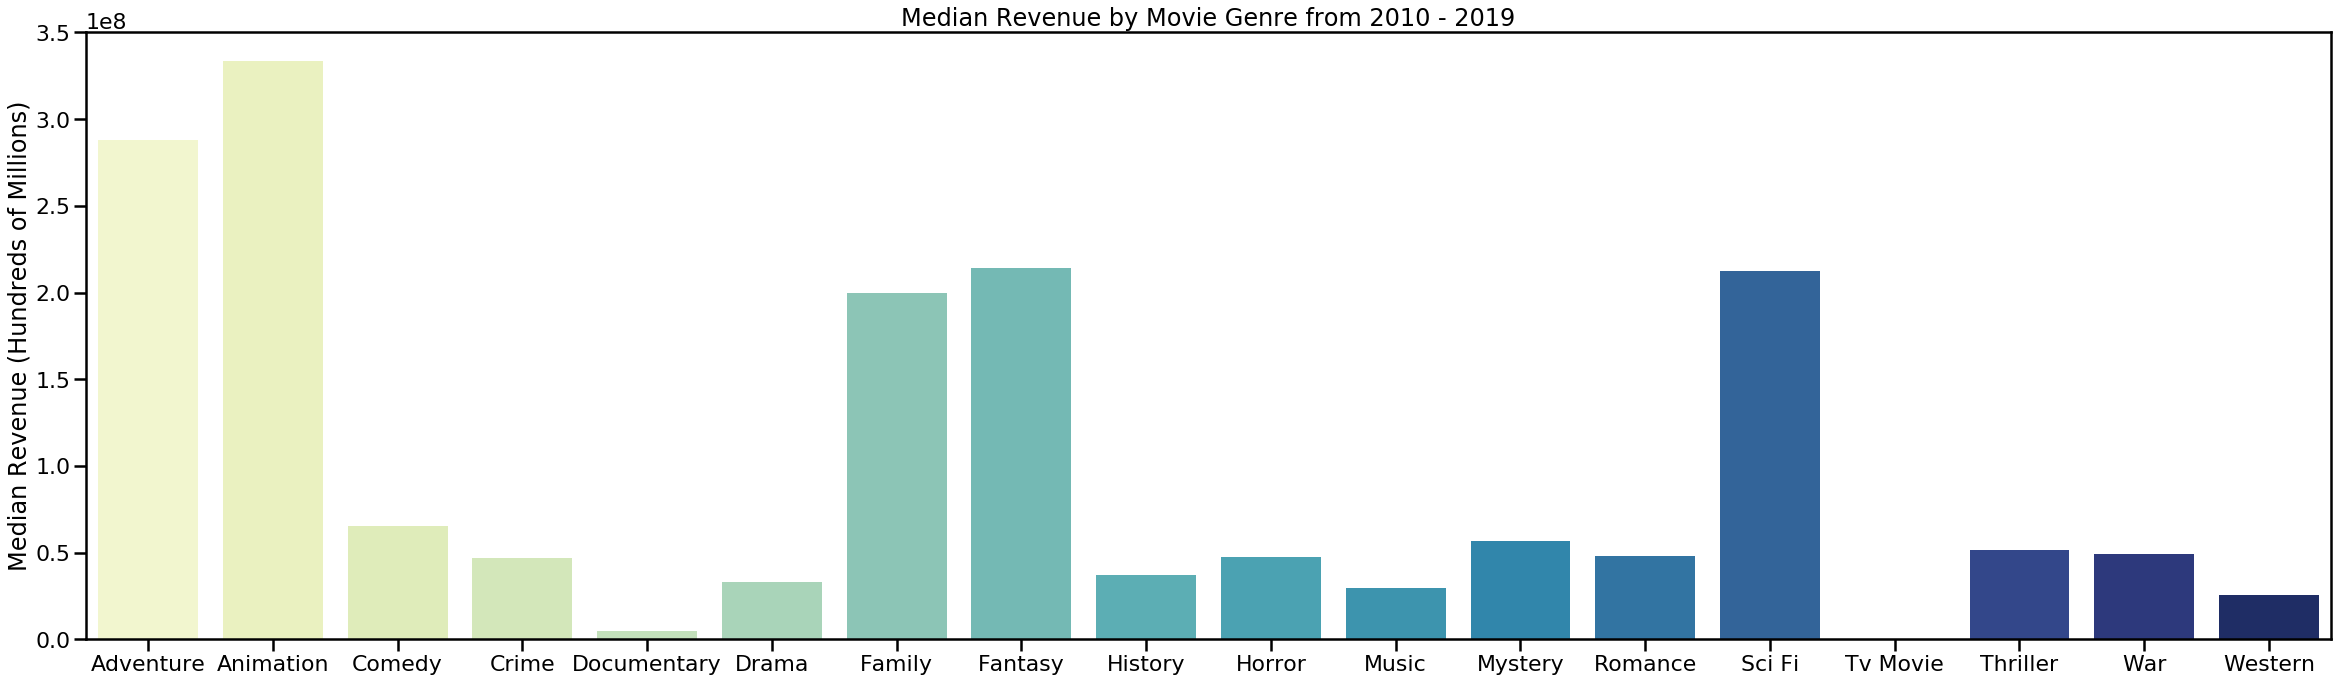

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
ROI_plot_10 = sns.barplot(titles_rev_10, rev_10,palette = palette, ax=ax)
ROI_plot_10.set_title("Median Revenue by Movie Genre from 2010 - 2019")
ROI_plot_10.set_ylabel("Median Revenue (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Median Rev Genre 10.png")
plt.show()

#### Investigating the next two questions:

Does a higher movie budget equate to higher ROI/profit?

Does a higher movie budget equate to higher revenue?

Slicing dataframe to include only production budget, ROI, worldwide revenue and worldwide profit/loss

In [32]:
budget_vs_profit = clean_df[["production_budget", "roi", "worldwide_profit(loss)", "worldwide_gross"]]

Defining a function to remove outliers

In [33]:
def remove_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>=(q1-(1.5*iqr))) & (df[column_name]<=(q3+(1.5*iqr)))]

In [34]:
budget_vs_profit

,production_budget,roi,worldwide_profit(loss),worldwide_gross
0,425000000,553.257713,2351345279,2776345279
1,410600000,154.667286,635063875,1045663875
2,350000000,-57.210757,-200237650,149762350
3,330600000,324.384139,1072413963,1403013963
4,300000000,582.711400,1748134200,2048134200
...,...,...,...,...
4156,25000,11434.644000,2858661,2883661
4157,25000,1859.168000,464792,489792
4158,23000,5236.991304,1204508,1227508
4159,7000,11927.514286,834926,841926


Plotting a regression plot of budget vs ROI

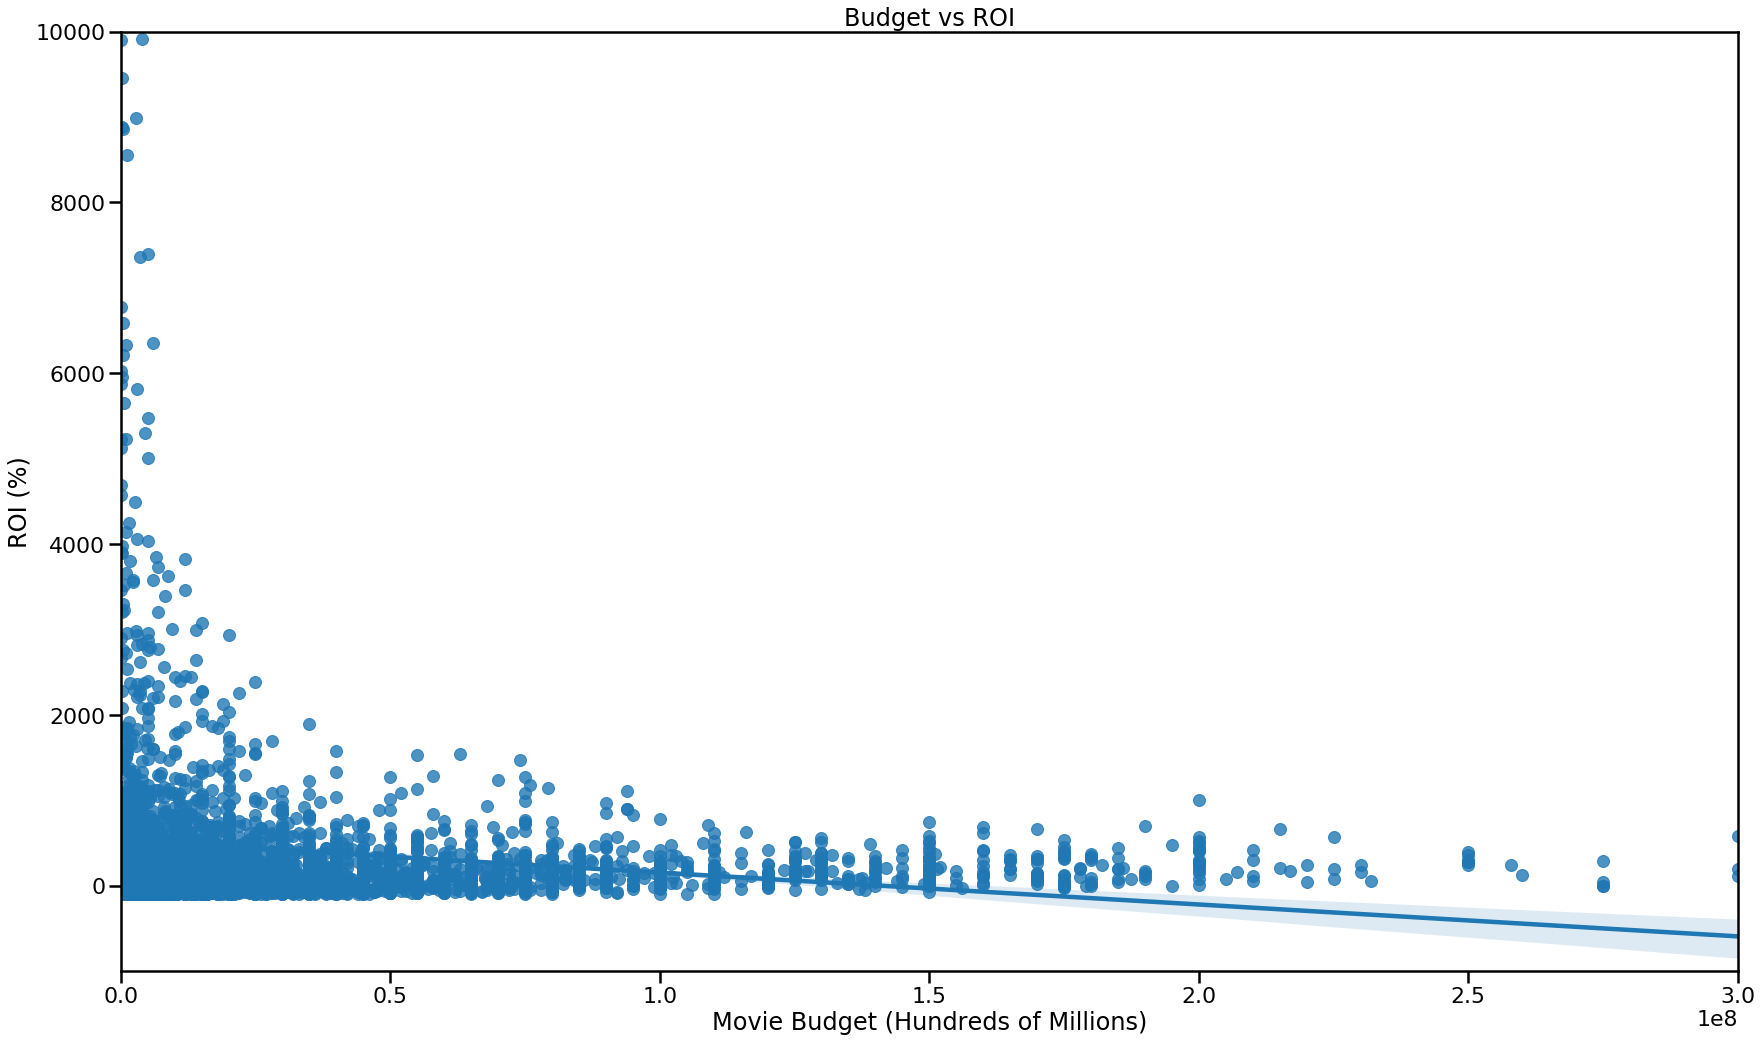

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="roi", data = budget_vs_profit, ax = ax)
budget_profit_plot.set_title("Budget vs ROI")
budget_profit_plot.set_ylabel("ROI (%)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
budget_profit_plot.set(xlim = (0, 300000000), ylim = (-1000, 10000))
plt.tight_layout()
plt.savefig(figpath + "Budget v ROI.png")
plt.show()

Plotting a regression plot of budget vs roi not including ROI outliers

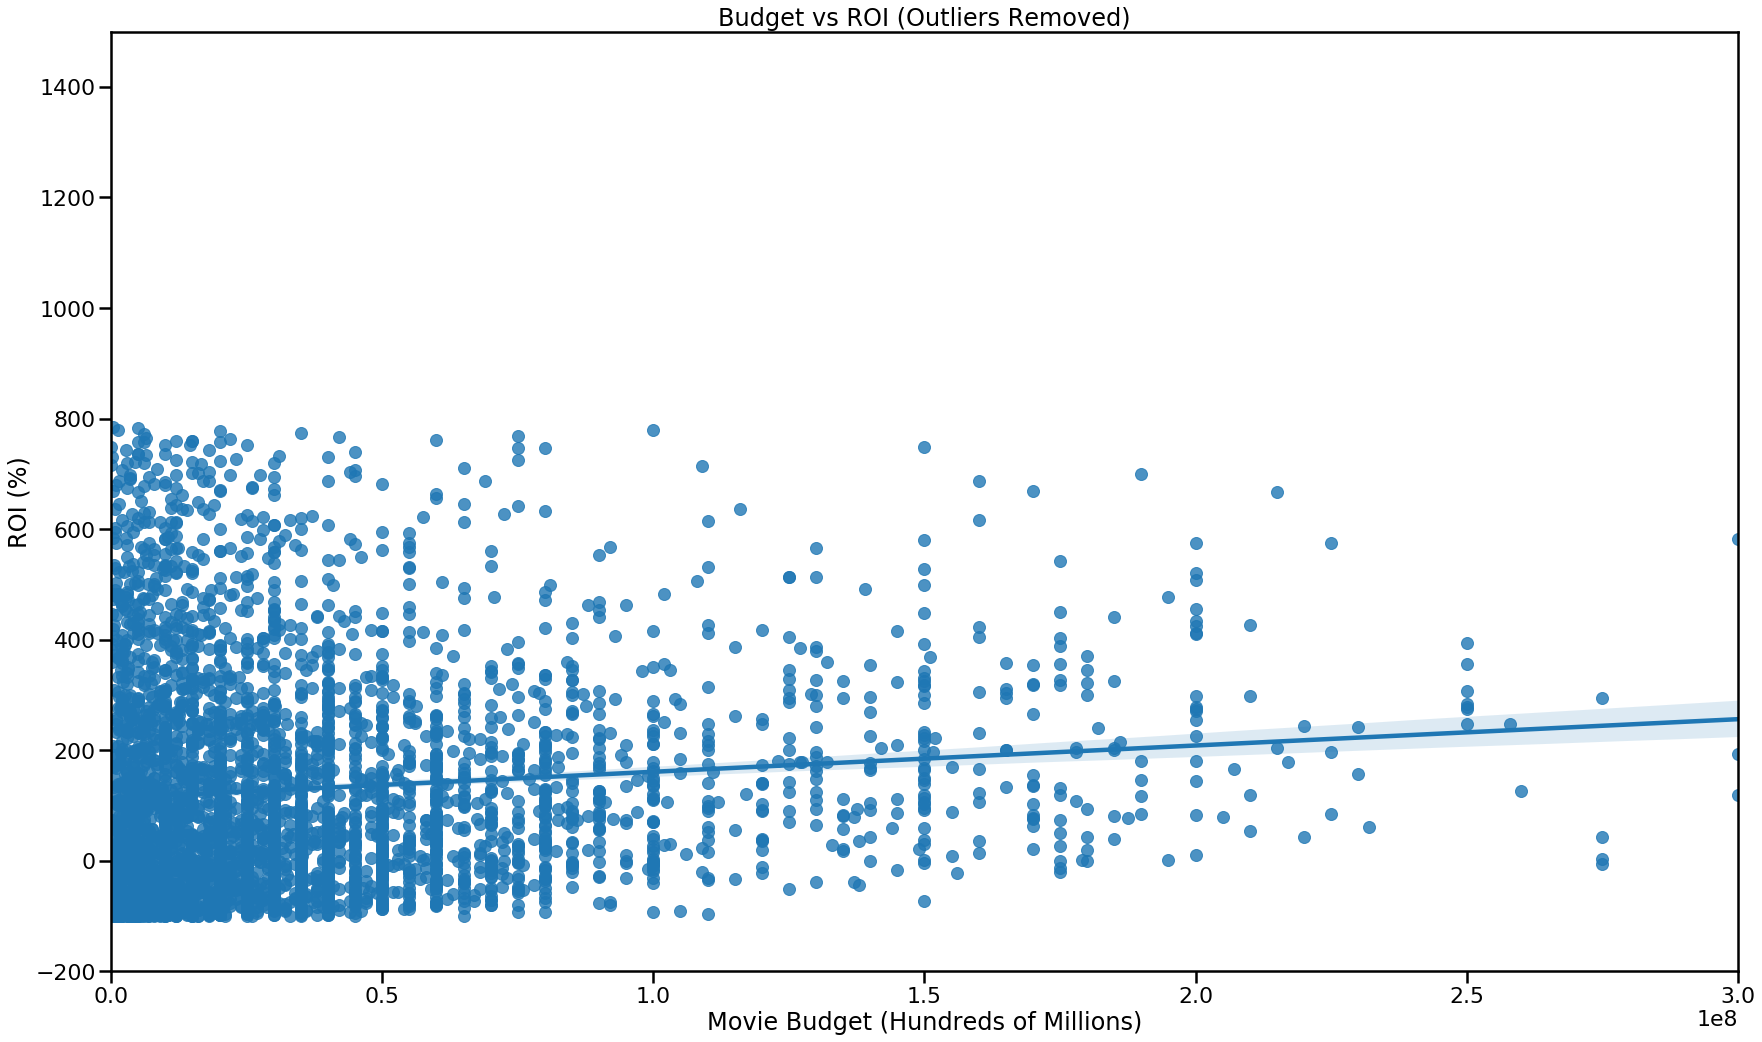

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="roi", data = remove_outliers(budget_vs_profit, "roi"), ax = ax)
budget_profit_plot.set_title("Budget vs ROI (Outliers Removed)")
budget_profit_plot.set_ylabel("ROI (%)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
budget_profit_plot.set(xlim = (0, 300000000), ylim = (-200, 1500))
plt.tight_layout()
plt.savefig(figpath + "Budget v ROI No Outliers.png")
plt.show()

Plotting a regression plot of budget vs profit in absolute terms

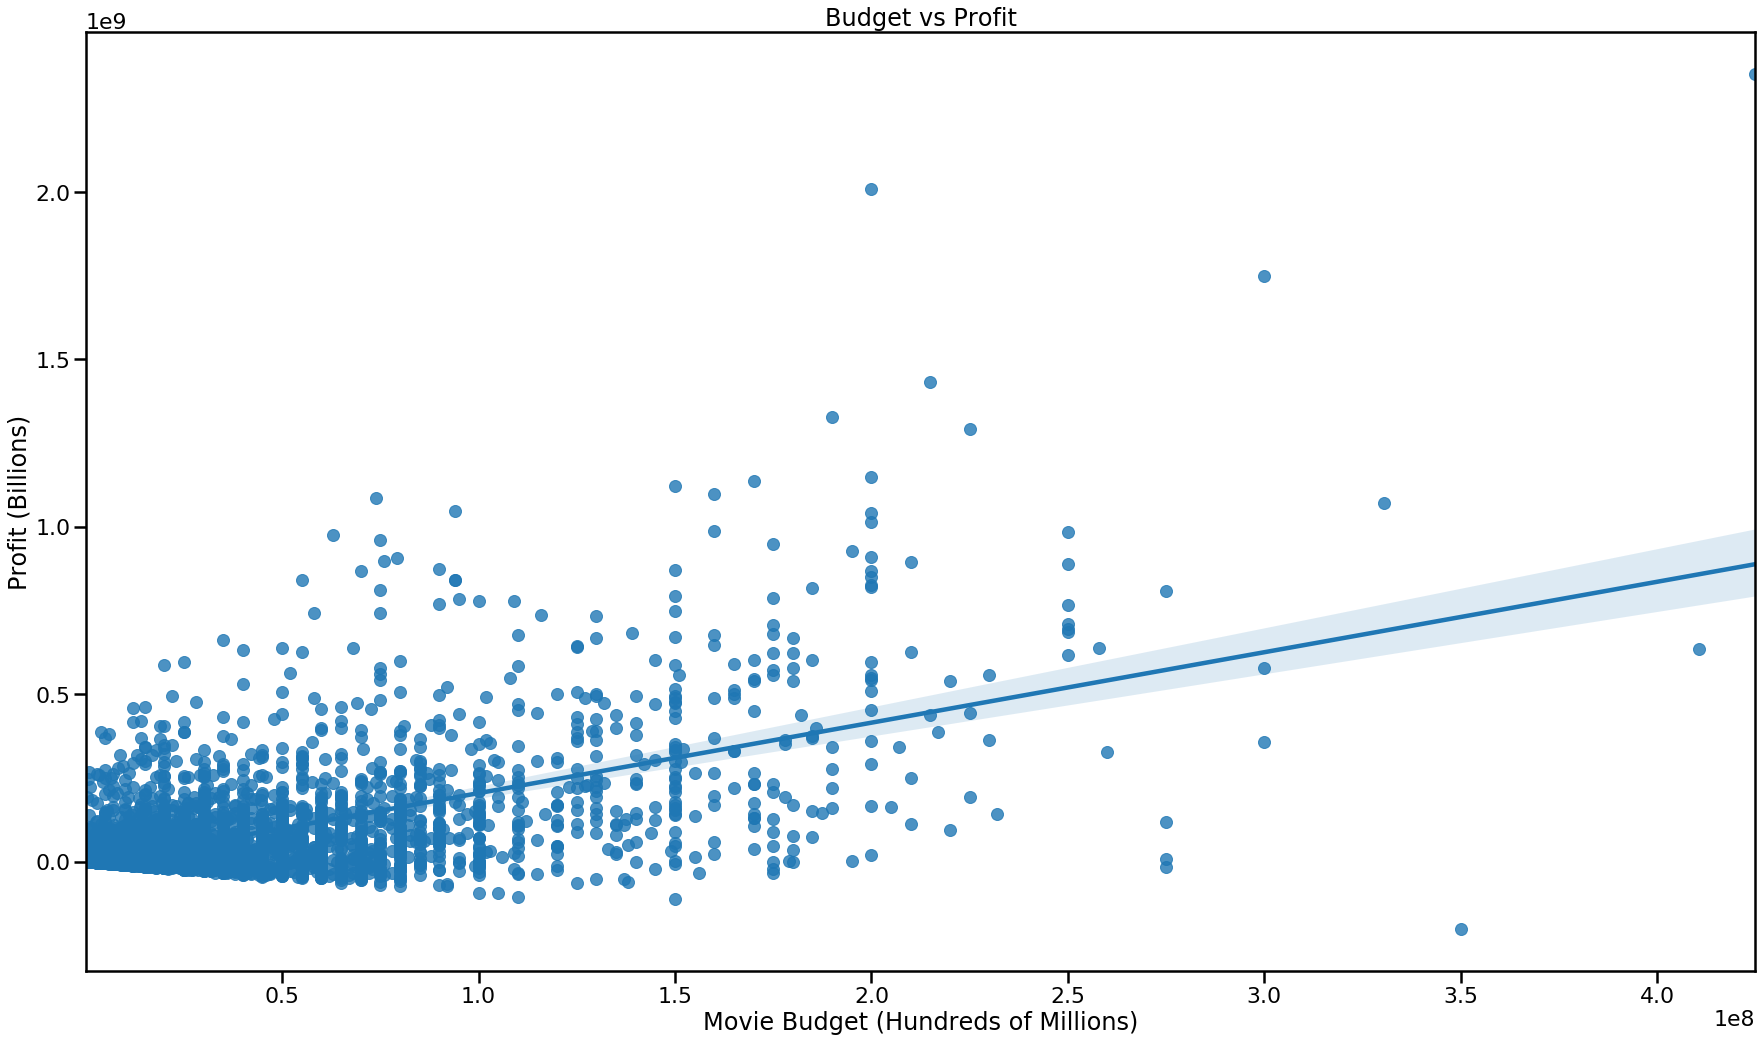

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_profit(loss)", data = budget_vs_profit, ax = ax)
budget_profit_plot.set_title("Budget vs Profit")
budget_profit_plot.set_ylabel("Profit (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Profit.png")
plt.show()

Plotting a regression plot of budget vs profit not including ROI outliers

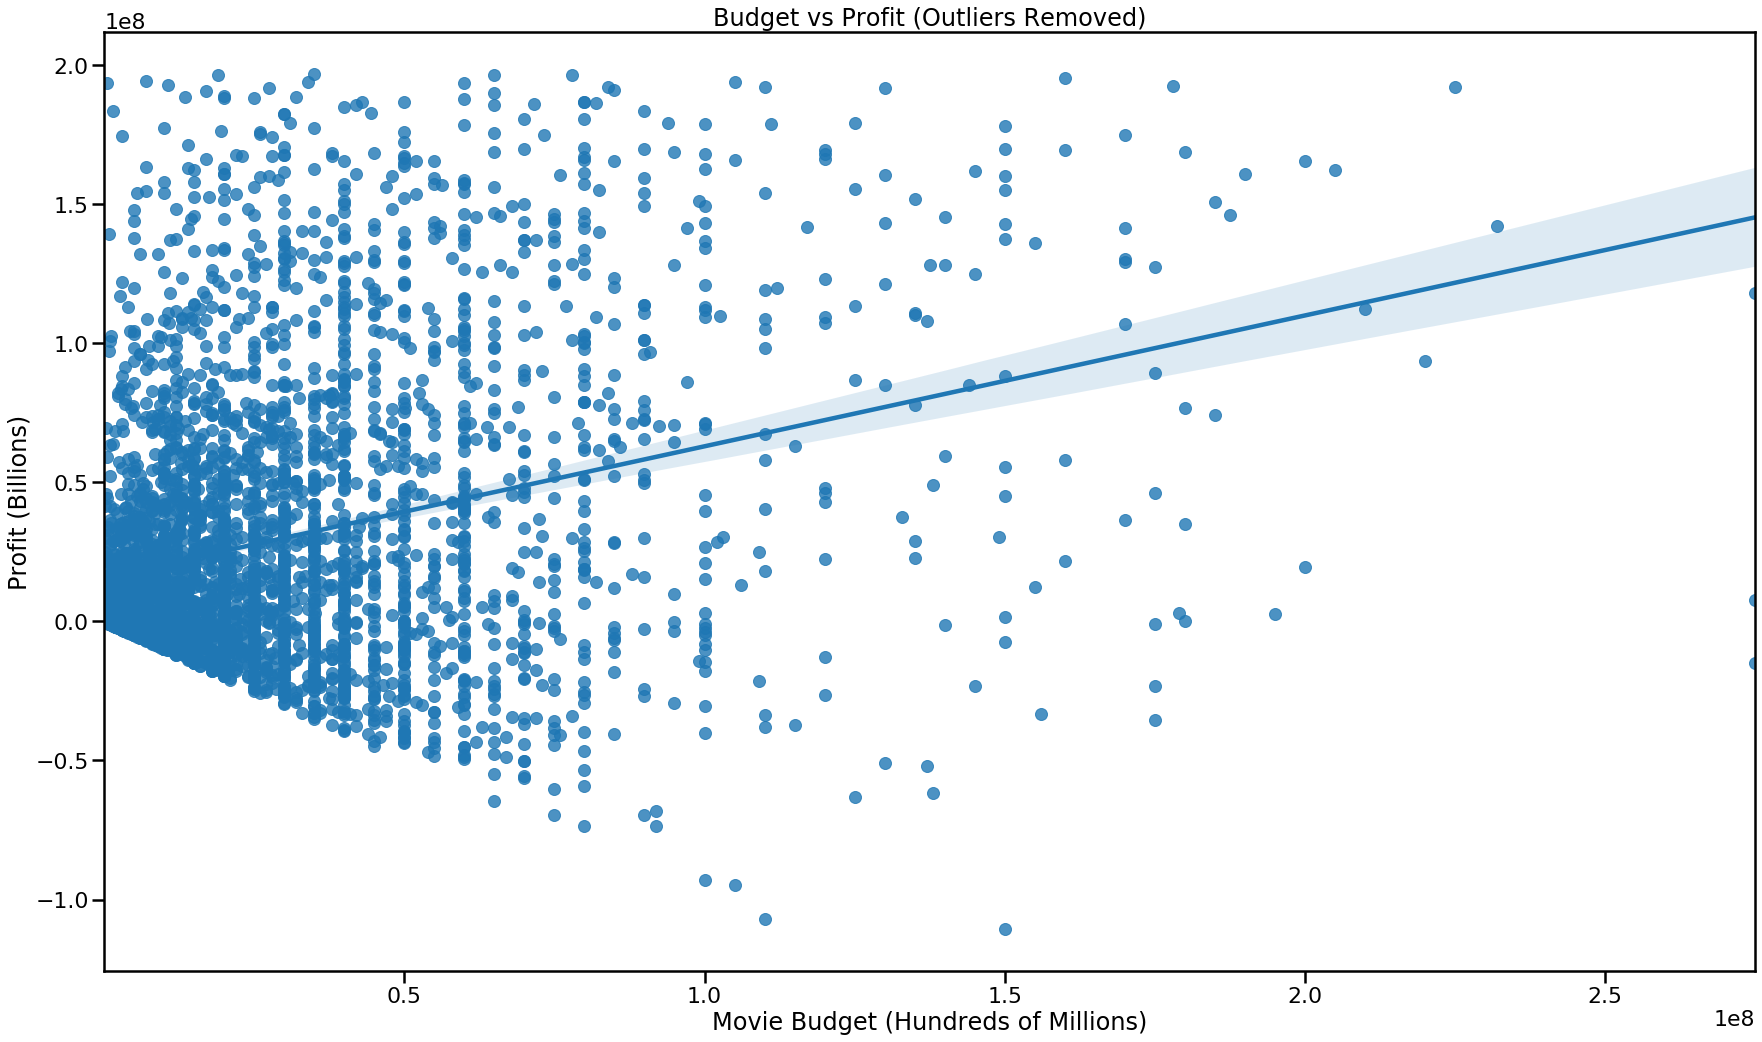

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_profit(loss)", data = remove_outliers(budget_vs_profit, "worldwide_profit(loss)"), ax = ax)
budget_profit_plot.set_title("Budget vs Profit (Outliers Removed)")
budget_profit_plot.set_ylabel("Profit (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Profit No Outliers.png")
plt.show()

Plotting a regression plot of budget vs revenue

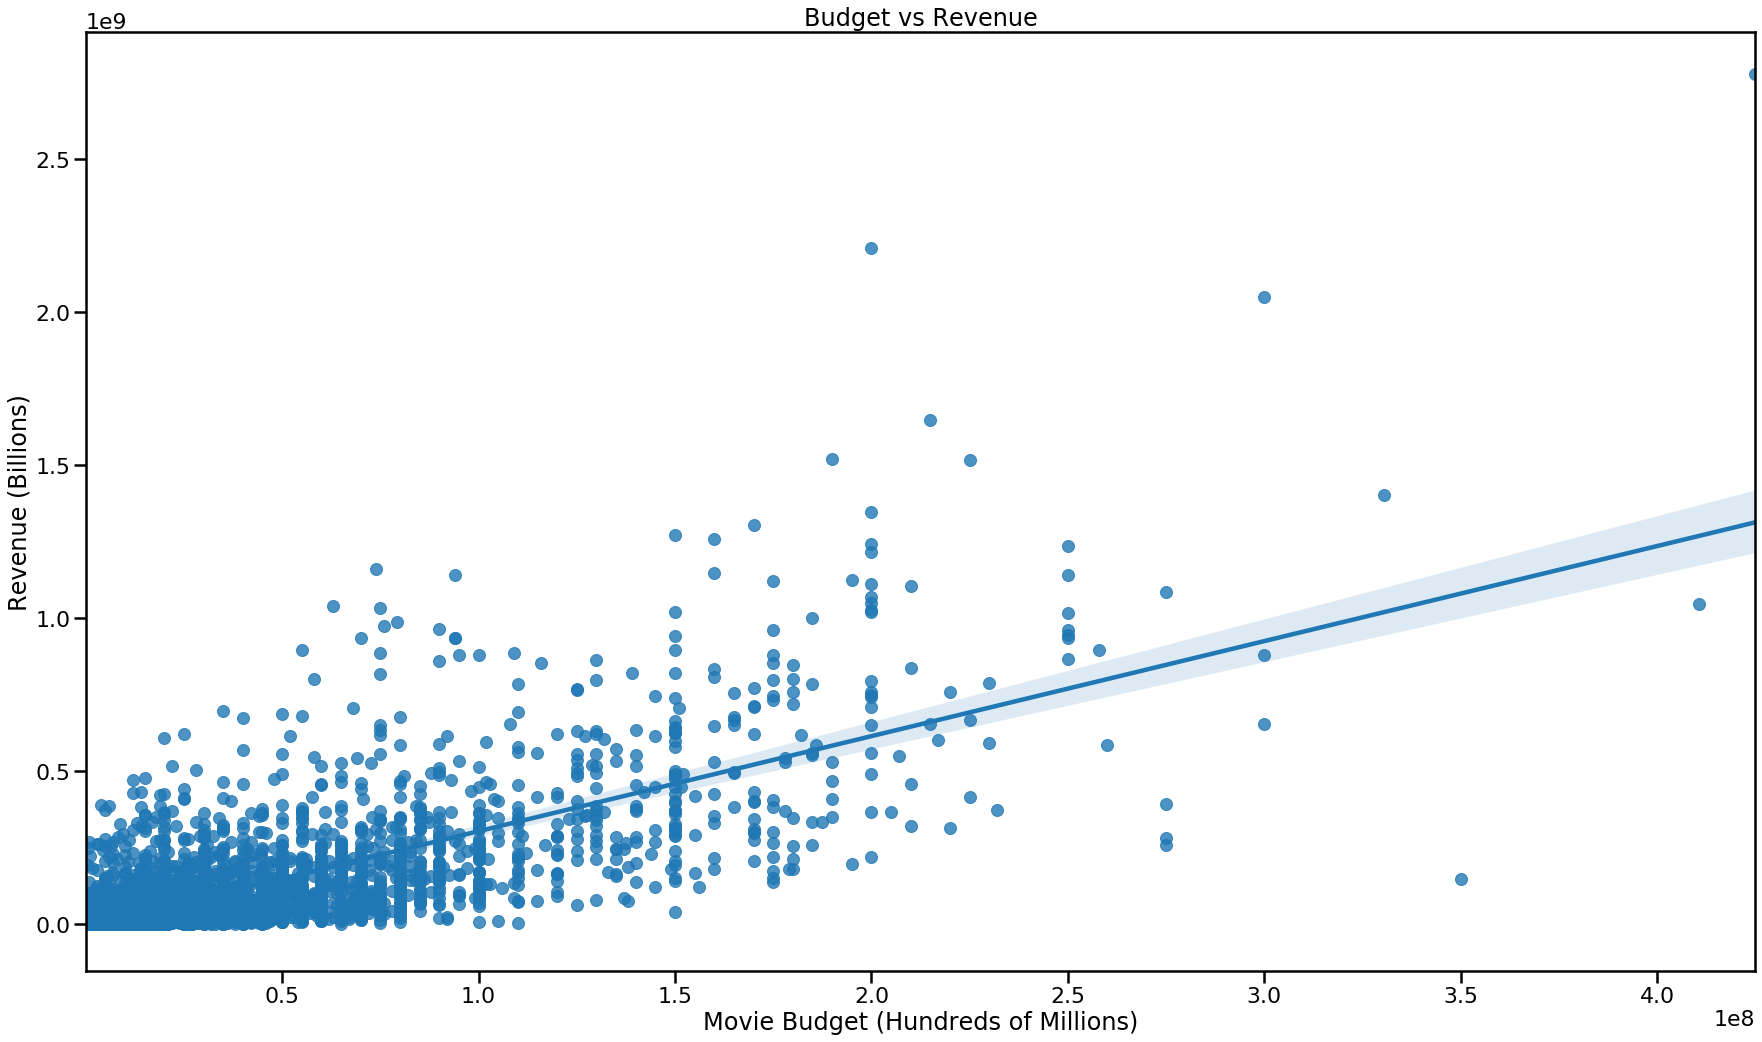

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_gross", data = budget_vs_profit, ax = ax)
budget_profit_plot.set_title("Budget vs Revenue")
budget_profit_plot.set_ylabel("Revenue (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Rev.png")
plt.show()

Plotting a regression plot of budget vs revenue not including outliers

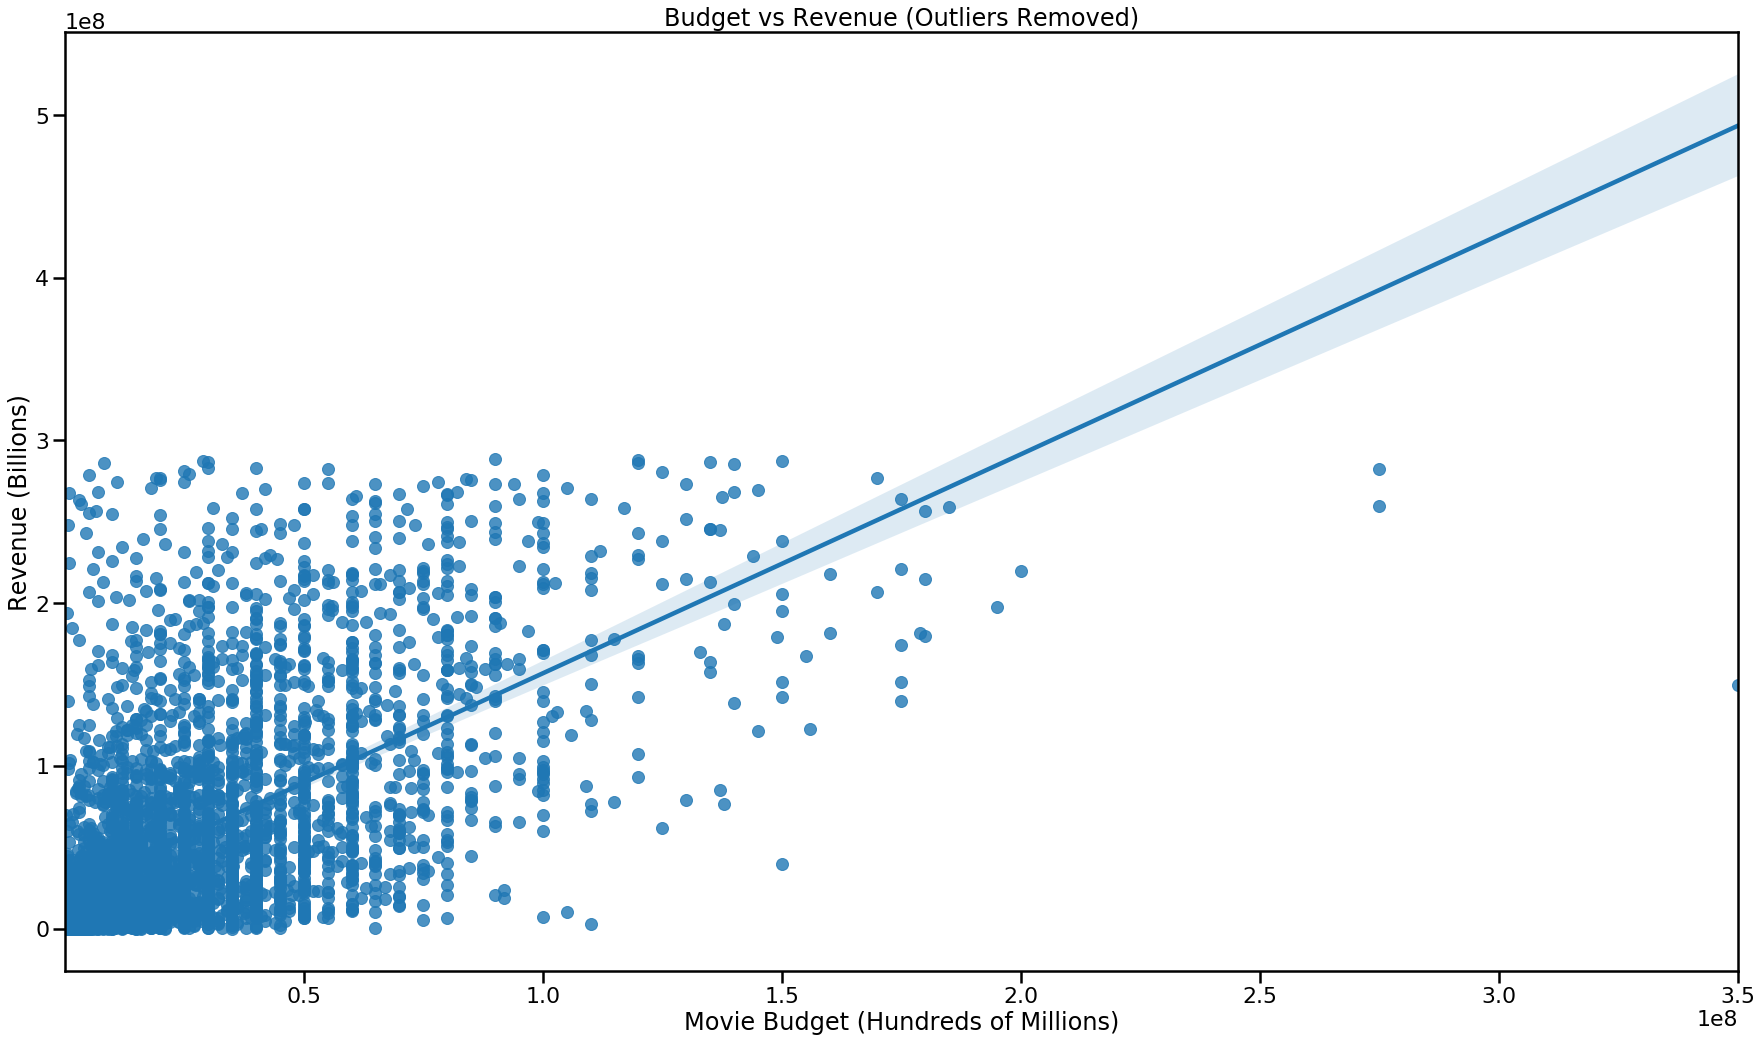

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_gross", data = remove_outliers(budget_vs_profit, "worldwide_gross"), ax = ax)
budget_profit_plot.set_title("Budget vs Revenue (Outliers Removed)")
budget_profit_plot.set_ylabel("Revenue (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Rev No Outliers.png")
plt.show()

#### Investigating the last two questions:

Which popular genre combinations are the most/least profitable (ROI)?

Which popular genre combination has the highest/lowest revenue?

Defining a function that calculates the median ROI for two genres in combination

In [41]:
def roi_by_genres(genre1, genre2, df):
        try:
            return df.groupby([genre1, genre2]).median()["roi"].loc[True].loc[True]
        except KeyError:
            return None

Testing the function

In [42]:
roi_by_genres("romance", "comedy", clean_df)

113.22021666666667

Listing popular genre combinations

In [43]:
genre_combinations = [["romance", "comedy"], ["romance", "drama"], ["drama", "thriller"], ["thriller", "crime"], ["action", "adventure"], ["action", "thriller"], ["drama", "comedy"], ["thriller", "horror"], ["comedy", "animation"]]

Running genre combination function and storing ROI results in a dictionary

In [44]:
genre_combos = {}
for combo in genre_combinations:
    genre_combos[str(combo)] = roi_by_genres(combo[0], combo[1], clean_df)

In [45]:
genre_combos

{"['romance', 'comedy']": 113.22021666666667,
 "['romance', 'drama']": 108.78637857142857,
 "['drama', 'thriller']": 73.17679692307692,
 "['thriller', 'crime']": 66.60828285714285,
 "['action', 'adventure']": 125.46396071428572,
 "['action', 'thriller']": 79.06028610294118,
 "['drama', 'comedy']": 89.5863,
 "['thriller', 'horror']": 164.6864358974359,
 "['comedy', 'animation']": 215.32571727272727}

Defining a function that cleans the genre combination titles

In [46]:
def clean_combos(title_combos):
    clean_combos = {}
    for title in title_combos:
        clean_combos[title] = title.strip("[]").replace(",", " -").replace("'", "").title()
    return clean_combos
title_combos = list(clean_combos(genre_combos.keys()).values())

In [47]:
ROI_combos = list(genre_combos.values())

Plotting a bar chart of the Median ROI for popular genre combinations

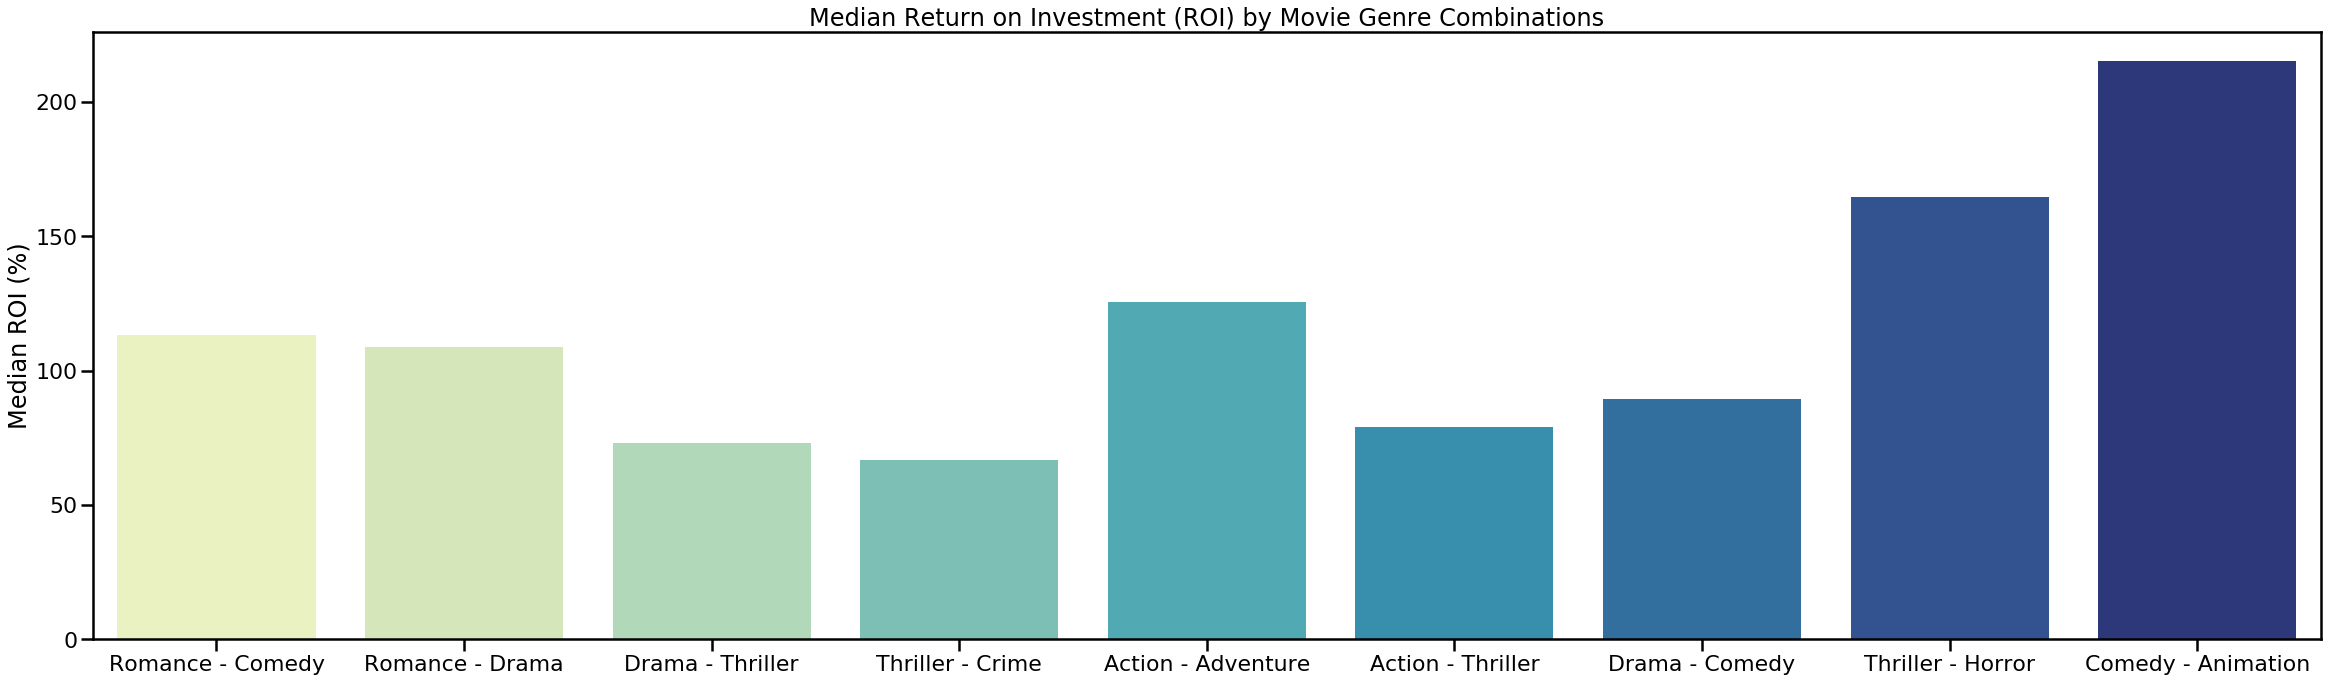

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
combo_plot = sns.barplot(title_combos, ROI_combos, palette = palette, ax=ax)
combo_plot.set_title("Median Return on Investment (ROI) by Movie Genre Combinations")
combo_plot.set_ylabel("Median ROI (%)")
plt.tight_layout()
plt.savefig(figpath + "Genre Combo ROI.png")
plt.show()

Defining a function that calculates the median revenue of two genres in combination and storing results of that function in a dictionary

In [49]:
def revenue_by_genres(genre1, genre2, df):
        try:
            return df.groupby([genre1, genre2]).median()["worldwide_gross"].loc[True].loc[True]
        except KeyError:
            return None

In [50]:
genre_combos_rev = {}
for combo in genre_combinations:
    genre_combos_rev[str(combo)] = revenue_by_genres(combo[0], combo[1], clean_df)

Cleaning the titles of the genre combinations

In [51]:
title_combos_rev = list(clean_combos(genre_combos_rev.keys()).values())

In [52]:
combos_rev = list(genre_combos_rev.values())

Plotting bar chart of median revenue for popular genre combinations

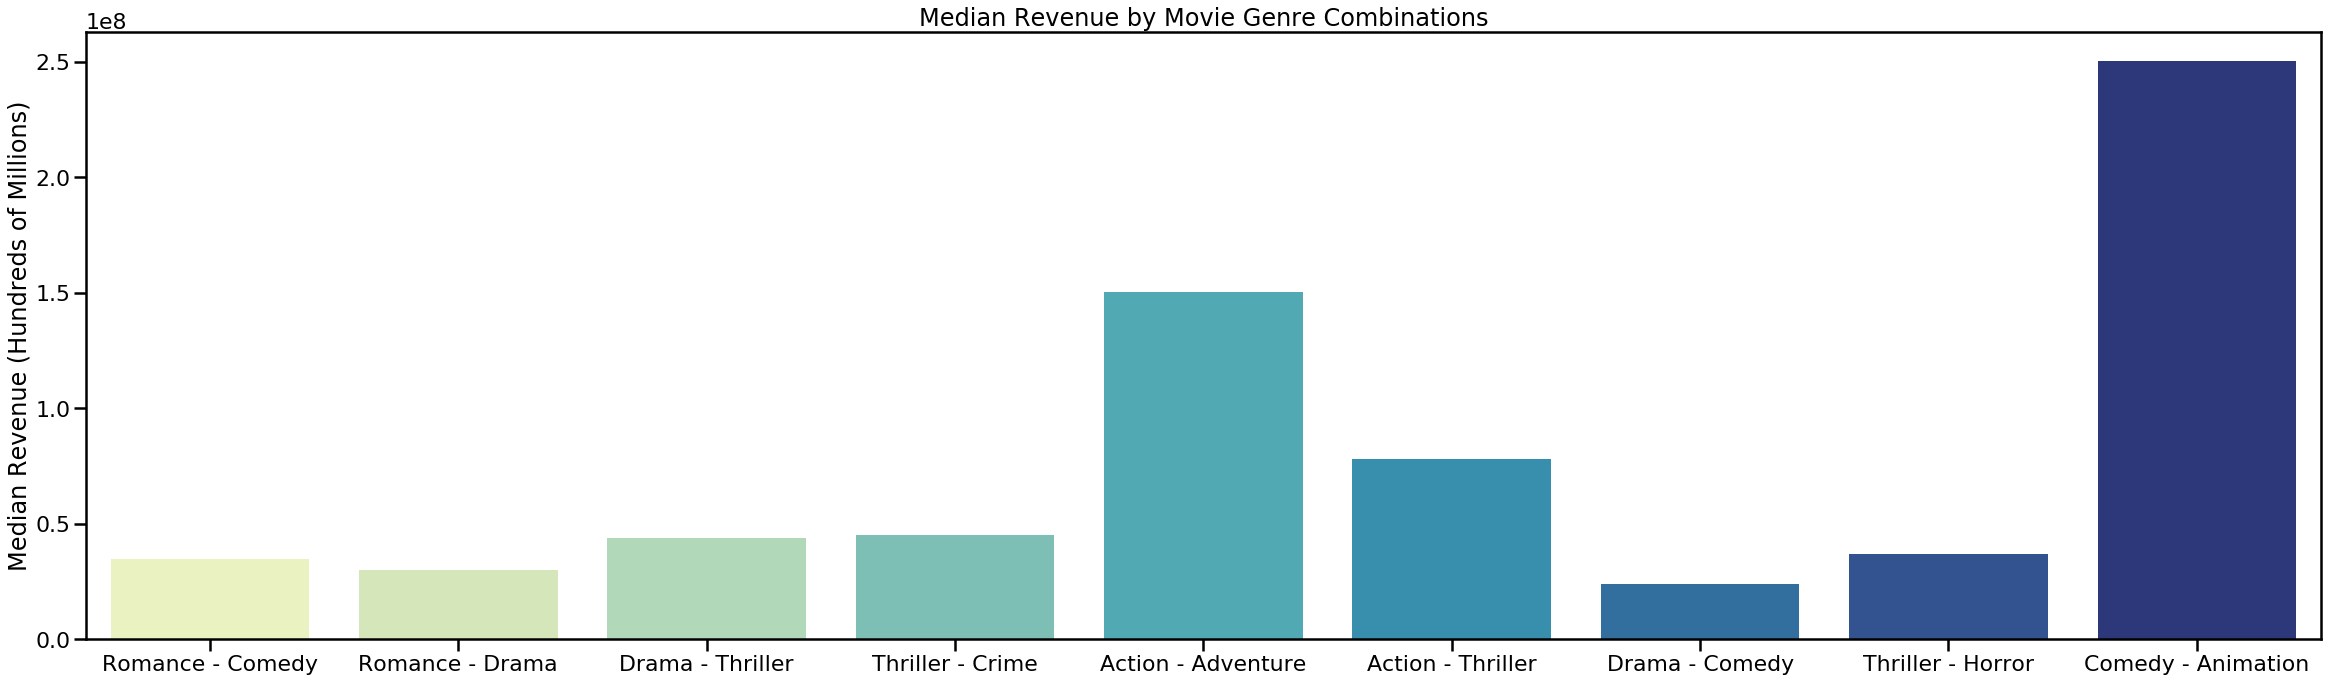

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
combo_plot = sns.barplot(title_combos_rev, combos_rev, palette = palette, ax=ax)
combo_plot.set_title("Median Revenue by Movie Genre Combinations")
combo_plot.set_ylabel("Median Revenue (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Genre Combos Rev.png")
plt.show()

### Insights

- Invest in animated films, due to their tendency to have high revenues and high profits
- Animation and comedy were the highest earning and most profitable genre combinations
- A higher budget can result in higher revenues, but not necessarily higher profits


### Limitations
- Our data was limited to movies that were present in both the Numbers database and TMDB
- Dataset is approximately a year old, so it is missing recent data
- Certain genres had less information than others, potentially skewing that data
- There were significant outliers in certain aspects of the data, including ROI
